In [1]:
# !pip install librosa matplotlib pandas tensorflow tensorflow-io==0.24.0 tensorflow-model-optimization
!pip install --upgrade tensorflow_io
!pip install librosa matplotlib pandas tensorflow==2.8.0 tensorflow-io==0.25.0 tensorflow-model-optimization
!pip install git+https://github.com/ARM-software/CMSIS_5.git@5.8.0#egg=CMSISDSP\&subdirectory=CMSIS/DSP/PythonWrapper

import tensorflow as tf
# Installing the command line tools we will need to build applications for the Raspberry Pi RP2040:
tf.keras.utils.get_file('cmake-3.21.0-linux-x86_64.tar.gz',
                        'https://github.com/Kitware/CMake/releases/download/v3.21.0/cmake-3.21.0-linux-x86_64.tar.gz',
                        cache_dir='./',
                        cache_subdir='tools',
                        extract=True)
tf.keras.utils.get_file('gcc-arm-none-eabi-10-2020-q4-major-x86_64-linux.tar.bz2',
                        'https://developer.arm.com/-/media/Files/downloads/gnu-rm/10-2020q4/gcc-arm-none-eabi-10-2020-q4-major-x86_64-linux.tar.bz2',
                        cache_dir='./',
                        cache_subdir='tools',
                        extract=True)
!apt-get install -y xxd

import os
# Now add the downloaded and extracted tools to the PATH environmental variable, so we can use them later on without specifying the full path to them:
os.environ['PATH'] = f"{os.getcwd()}/tools/cmake-3.21.0-linux-x86_64/bin:{os.environ['PATH']}"
os.environ['PATH'] = f"{os.getcwd()}/tools/gcc-arm-none-eabi-10-2020-q4-major/bin:{os.environ['PATH']}"

# We can use git to get the v1.2.0 of the Raspberry Pi Pico SDK
os.environ['PICO_SDK_PATH'] = f"{os.getcwd()}/pico-sdk"

# for SparkFun MicroMod
# os.environ['PICO_BOARD'] = 'sparkfun_micromod'

# for Raspberry Pi Pico (uncomment next line)
os.environ['PICO_BOARD'] = 'pico'

print(f"PICO_BOARD env. var. set to '{os.environ['PICO_BOARD']}'")

# ESC-50 dataset will be downloaded and extracted to the datasets by TensorFlow function
tf.keras.utils.get_file('esc-50.zip',
                        'https://github.com/karoldvl/ESC-50/archive/master.zip',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 51.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.8 MB/s eta 0:00:00

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ARM-software/CMSIS_5.git (to revision 5.8.0) to /tmp/pip-install-19y122ak/cmsisdsp_180279ffd7484ba0b16166102e4a77e9
  Running command git clone --filter=blob:none --quiet https://github.com/ARM-software/CMSIS_5.git /tmp/pip-install-19y122ak/cmsisdsp_180279ffd7484ba0b16166102e4a77e9
  Running command git checkout -q 649bd8aa41ed7d86b416c89cdb4b820b899a4cbc
  Resolved https://github.com/ARM-software/CMSIS_5.git to commit 649bd8aa41ed7d86b416c89cdb4b820b899a4cbc
  Preparing metadata (setup.py) ... done
  Created wheel for CMSISDSP: filename=CMSISDSP-1.0.0-cp310-cp310-linux_x86_64.whl size=1432022 sha256=92cb722b11a4d9bc8242ade5eb08f99dac1392fb45708e66a788a6803a6fc675
  Stored in directory: /tmp/pip-ephem-wheel-cache-r1krpzcj/wheels/91/e0/e0/a9f82222f5d1eac8dca08f231ea3bffa47d79f51a2da4355f1
Successfully built CMSISDSP
156893184/156882554 [========================

'./datasets/esc-50.zip'

In [2]:
%%shell
git clone --branch 1.2.0 https://github.com/raspberrypi/pico-sdk.git
cd pico-sdk
git submodule init
git submodule update

Cloning into 'pico-sdk'...
remote: Enumerating objects: 7407, done.
remote: Counting objects: 100% (453/453), done.
remote: Compressing objects: 100% (316/316), done.
remote: Total 7407 (delta 173), reused 310 (delta 103), pack-reused 6954
Receiving objects: 100% (7407/7407), 2.90 MiB | 1.69 MiB/s, done.
Resolving deltas: 100% (3803/3803), done.
Note: switching to 'bfcbefafc5d2a210551a4d9d80b4303d4ae0adf7'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Submodule 'tinyusb' (https://github.com/hathach/tinyusb.git) registered 

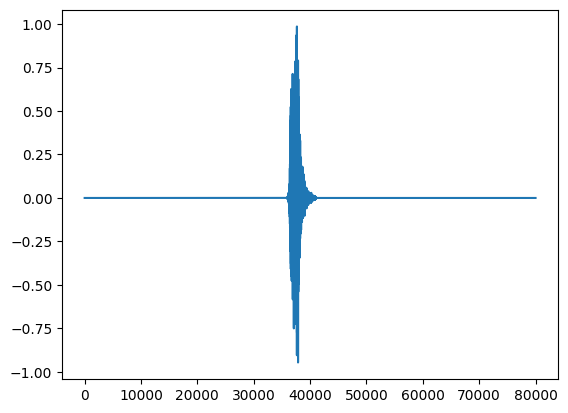

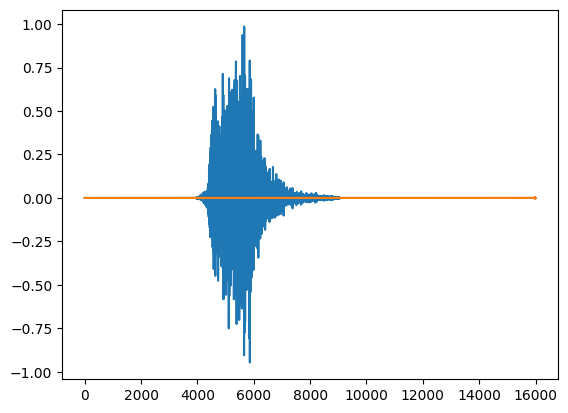

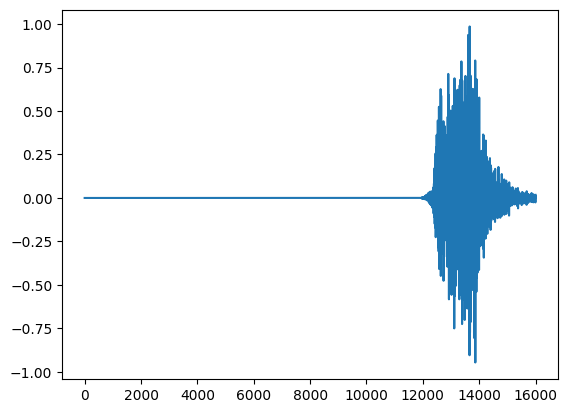

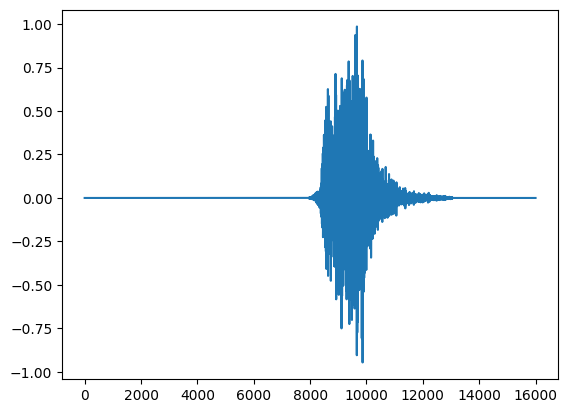

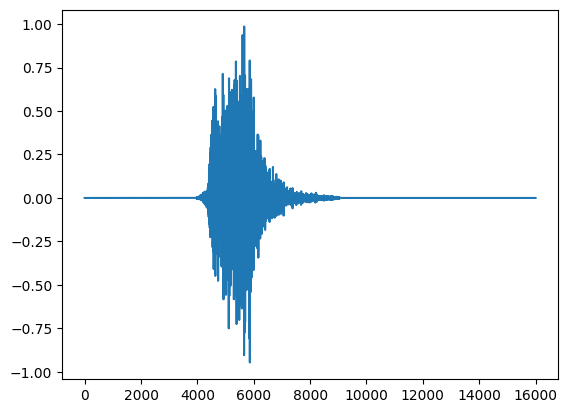

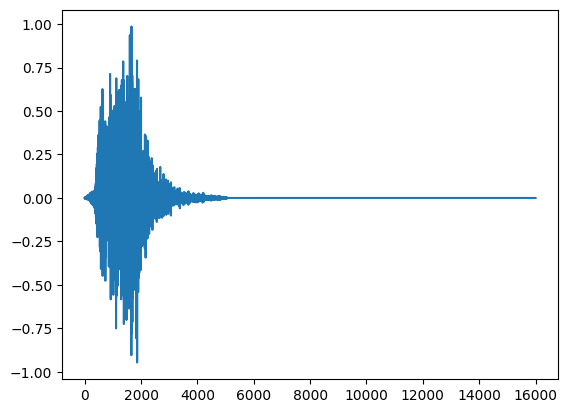

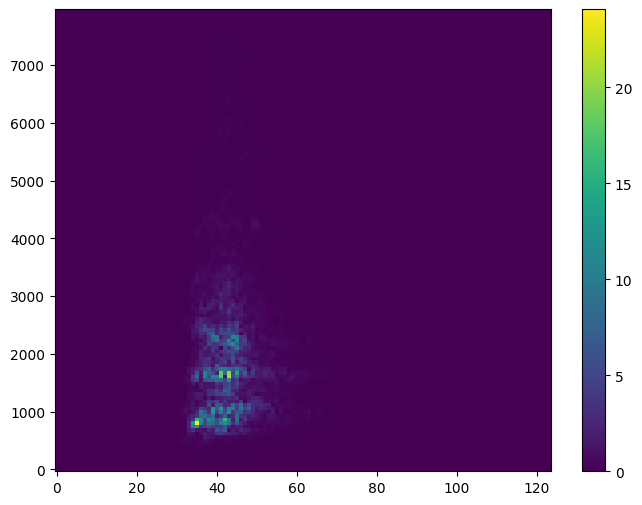

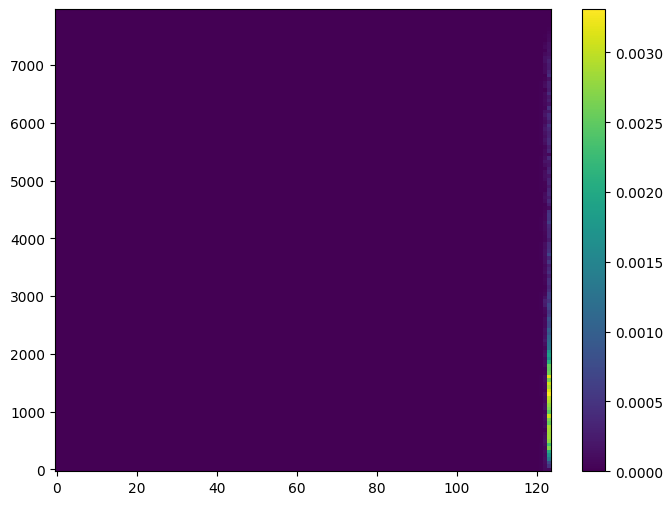

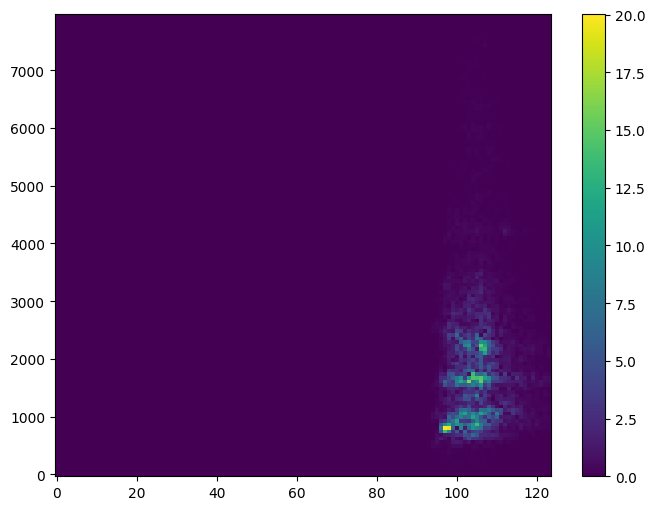

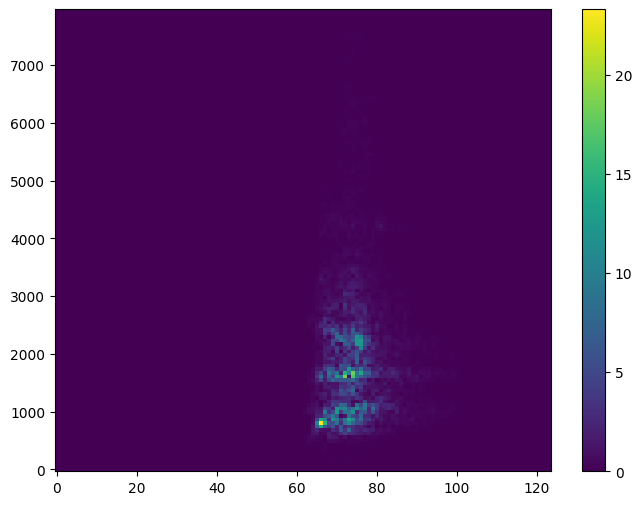

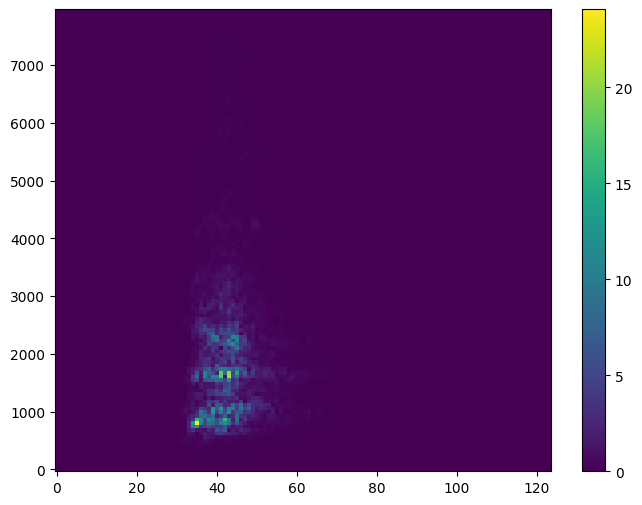

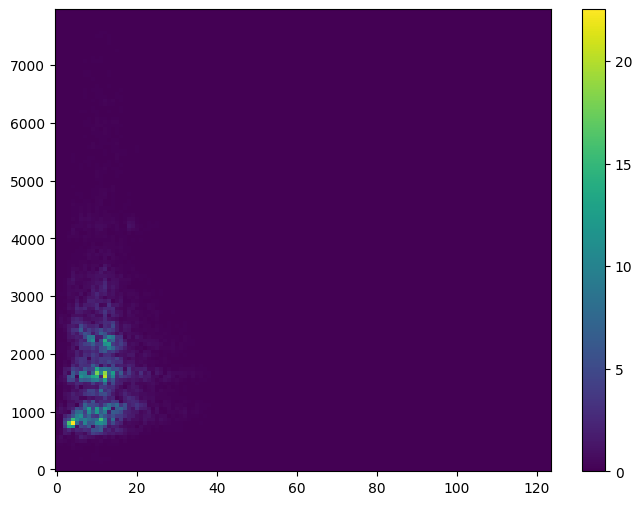

Input shape: (124, 129, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 8)         520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 8)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dropout (Dropout)           (None, 288)               0

In [3]:
import pandas as pd
from os import path
import tensorflow_io as tfio
import librosa
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

# Load dataset metadata:
# Now using pandas library to read the datasets/ESC-50-master/meta/esc50.csv file with its metadata for the ESC-50 dataset:
esc50_csv = './datasets/ESC-50-master/meta/esc50.csv'
base_data_path = './datasets/ESC-50-master/audio/'
df = pd.read_csv(esc50_csv) # reads the csv-data as a table
df.head() # returns the first five rows of he dataset



# add new column with the fullpath of the wave files
base_data_path = './datasets/ESC-50-master/audio/'
df['fullpath'] = df['filename'].map(lambda x: path.join(base_data_path, x)) 
# connecting the filename (wav-data) to the the specific path and adding it as a new columns
df.head()



# Load wave file data:
# Defining a new function named load_wav to load audio samples from a wave file using 
# TensorFlow's "tf.io.read_file(...)" and "t.audio.decode_wav(...)" API's. The "tf.io.audio.resample(...)" API 
# will be used to resample the audio data at the specific sampling rate librosa's "load(...)" API will be used 
# as fallback if TensorFlow is unable to decode the wave file.
def load_wav(filename, desired_sample_rate, desired_channels):
  try:
    file_contents = tf.io.read_file(filename) # reads the filename and stores it
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=desired_channels)
    # decodes the stored filenames (data) and its desired channel to float tensor (-1.0-1.0) and returns the sample_rate
    wav = tf.squeeze(wav, axis=-1) # removes all dimensions of size 1 from the shape of a tensor
  except:
    # fallback to librosa if the wav file can be read with TF
    filename = tf.cast(filename, tf.string)
    wav, sample_rate = librosa.load(filename.numpy().decode('utf-8'), sr=None, mono=(desired_channels == 1))
  
  wav = tfio.audio.resample(wav, rate_in=tf.cast(sample_rate, dtype=tf.int64), rate_out=tf.cast(desired_sample_rate, dtype=tf.int64))
  # resamples the new wav tensor variable from the input sample rate to the output sample rate 
  return wav



# Now loading the first wave file (sound of a dog barking) from the pandas DataFrame and plot this overtime. 
# The IPython.display.Audio(...) API can be used to playback the audio samples  
sample_rate = 16000
channels = 1
test_wav_file_path = df['fullpath'][0] # storing the first audio data path
test_wav_data = load_wav(test_wav_file_path, sample_rate, channels)
# using the first audio data path -> loading the file as tensor wav-file and resample it
plt.plot(test_wav_data)
plt.show()
display.Audio(test_wav_data, rate=sample_rate)
_ = plt.plot(test_wav_data[32000:48000])



# Using tf.data.Dataset from TensorFlow API to load all wav files from the dataset
fullpaths = df['fullpath'] # saving the all the fullpath-data
targets = df['target'] # saving all targets
folds = df['fold'] # saving all folds
fullpath_ds = tf.data.Dataset.from_tensor_slices((fullpaths, targets, folds))
fullpath_ds.element_spec



# Map each fullpath value to wave files
def load_wav_for_map(fullpath, label, fold):
  wav = tf.py_function(load_wav, [fullpath, sample_rate, channels], tf.float32)
  # wraps a python function into a TF operation using the "load_wav"-function setting fullpath, sample_rate and channels as parameters
  return wav, label, fold
wav_ds = fullpath_ds.map(load_wav_for_map)
wav_ds.element_spec



# Split wave file data
# training the model on 1 second soundbite, therefore splitting the 5 seconds of audio per item in the dataset 
# to slices of 160000 samples. Also striding the original audio samples at a time and filter any sound artifacts or sounds with pure silence out
@tf.function
def split_wav(wav, width, stride):
  return tf.map_fn(fn=lambda t: wav[t * stride:t * stride + width], elems=tf.range((tf.shape(wav)[0] - width) // stride), fn_output_signature=tf.float32)

@tf.function
def wav_not_empty(wav):
  return tf.experimental.numpy.any(wav)

def split_wav_for_flat_map(wav, label, fold):
  wavs = split_wav(wav, width=16000, stride=4000)
  labels = tf.repeat(label, tf.shape(wavs)[0])
  folds = tf.repeat(fold, tf.shape(wavs)[0])
  return tf.data.Dataset.from_tensor_slices((wavs, labels, folds))

split_wav_ds = wav_ds.flat_map(split_wav_for_flat_map)
split_wav_ds = split_wav_ds.filter(lambda x, y, z: wav_not_empty(x))



# plotting the 5 soundbites over time
for wav, _, _ in split_wav_ds.take(5):
  _ = plt.plot(wav)
  plt.show()



# Create Spectograms
# Transforming the audio data into an aduio spectrogram representation, which represents the audio signal's frequency content over time.
# The input audio signal has a sampling rate of 16kHz. Using TensorFlow's tf.signal.stff(...) function transforms a second of the 
# audio signal into a 2D tensor representation. Using a frame length of 256 and a frame step of 128, the output of this feature extraction will be a Tensor of shape (124, 129).
@tf.function
def create_spectrogram(samples):
  return tf.abs(
      tf.signal.stft(samples, frame_length=256, frame_step=128)
  )

spectrogram = create_spectrogram(test_wav_data[32000:48000])
spectrogram.shape  

def plot_spectrogram(spectrogram, vmax=None):
  transposed_spectrogram = tf.transpose(spectrogram)
  fig = plt.figure(figsize=(8,6))
  height = transposed_spectrogram.shape[0]
  X = np.arange(transposed_spectrogram.shape[1])
  Y = np.arange(height * int(sample_rate / 256), step = int(sample_rate / 256))
  im = plt.pcolormesh(X, Y, transposed_spectrogram, vmax = vmax)
  fig.colorbar(im)
  plt.show()

plot_spectrogram(spectrogram)

def create_spectrogram_for_map(samples, label, fold):
  return create_spectrogram(samples), label, fold

spectrograms_ds = split_wav_ds.map(create_spectrogram_for_map)
spectrograms_ds.element_spec



# plotting the first 5 spectrograms in the dataset
for s, _, _ in spectrograms_ds.take(5):
  plot_spectrogram(s)



# Split Dataset
# Before training the ML model, splitting the dataset is necessary. We split it in three parts: training, testing and validation.
# Before splitting the dataset, a random seed needs to be set for reproducibility:
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)
# Entries with a fold value of less than 4 will be used for training, the ones with will 4 be used for validation and the finally remaining items for testing.
# The fold column will be removed as it is no longer needed and the dimensions of the spectrogram shape will be changed from (124, 129) to (124, 129, 1)
cached_ds = spectrograms_ds.cache()
train_ds = cached_ds.filter(lambda spectrogram, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda spectrogram, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda spectrogram, label, fold: fold > 4)
# remove the folds column as it's no longer needed
remove_fold_column = lambda spectrogram, label, fold: (tf.expand_dims(spectrogram, axis=-1), label)
train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)
train_ds = train_ds.cache().shuffle(1000, seed=random_seed).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)



# Train Model
# Now creating a model using TensorFlow's Keras API. The model has 8 layers:
# 1. input layer
# 2. preprocessing layer to resize the input tensor from 124x129x1 to 32x32x1
# 3. normalization layer to scale input layer values between -1 and 1
# 4. 2D convolutional layer with: 8 filters, a kernel size of 8x8 and stride of 2x2 and ReLU activation layer
# 5. 2D max pooling layer with size of 2x2
# 6. flatten layer to flatten from 2D to 1D
# 7. dropout layer to reduce overfitting during training
# 8. dense layer with 50 outputs and softmax activation function, which outputs the probability of the sound category
# Before building the model, we will create the normalization layer and feed in all the spectrograms
for spectrogram, _, _ in cached_ds.take(1):
    input_shape = tf.expand_dims(spectrogram, axis=-1).shape
    print('Input shape:', input_shape)
  
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
norm_layer.adapt(cached_ds.map(lambda x, y, z: tf.reshape(x, input_shape))) 

baseline_model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=input_shape),
  tf.keras.layers.experimental.preprocessing.Resizing(32, 32, interpolation="nearest"), 
  norm_layer,
  tf.keras.layers.Conv2D(8, kernel_size=(8,8), strides=(2, 2), activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(50, activation='softmax')
])

baseline_model.summary()



# Compiling the model with accuracy as metrics, Adam optimizer and a sparse categorical crossentropy loss function
METRICS = ["accuracy",]

baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=METRICS,
)



# Defining early stopping and dynamic learning rate scheduler callbacks for training
def scheduler(epoch, lr):
  if epoch < 100:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=1, patience=25), 
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]



# Train the model
history = baseline_model.fit(
    train_ds, 
    validation_data=val_ds,  
    epochs=250,
    callbacks=callbacks,
)



# Evaluating the loss and accuracy of test dataset
baseline_model.evaluate(test_ds)

# Saving the the base model
baseline_model.save("baseline_model")
!zip -r baseline_model.zip baseline_model

In [ ]:
# Transfer Learning
# Download datasets:
tf.keras.utils.get_file('fire_alarms.tar.gz',
                        'https://github.com/ArmDeveloperEcosystem/ml-audio-classifier-example-for-pico/archive/refs/heads/fire_alarms.tar.gz',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)

!mkdir -p datasets/speech_commands
!curl -L -o datasets/speech_commands_v0.02.tar.gz http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!tar --wildcards --directory datasets/speech_commands -xzvf datasets/speech_commands_v0.02.tar.gz './_background_noise_/*'

fire_alarm_files_ds = tf.data.Dataset.list_files("datasets/ml-audio-classifier-example-for-pico-fire_alarms/*.wav", shuffle=False)
fire_alarm_files_ds = fire_alarm_files_ds.map(lambda x: (x, 1, -1))
background_noise_files_ds = tf.data.Dataset.list_files("datasets/speech_commands/_background_noise_/*.wav", shuffle=False)
background_noise_files_ds = background_noise_files_ds.map(lambda x: (x, 0, -1))

fire_alarm_wav_ds = fire_alarm_files_ds.map(load_wav_for_map)
fire_alarm_wav_ds = fire_alarm_wav_ds.cache()
background_noise_wav_ds = background_noise_files_ds.map(load_wav_for_map)
background_noise_wav_ds = background_noise_wav_ds.cache()

43835392/Unknown - 3s 0us/step  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2316M  100 2316M    0     0  62.2M      0  0:00:37  0:00:37 --:--:-- 98.3M
./_background_noise_/README.md
./_background_noise_/pink_noise.wav
./_background_noise_/running_tap.wav
./_background_noise_/exercise_bike.wav
./_background_noise_/doing_the_dishes.wav
./_background_noise_/dude_miaowing.wav
./_background_noise_/white_noise.wav


In [ ]:
# split audio samples into 1 second soundbites
split_fire_alarm_wav_ds = fire_alarm_wav_ds.flat_map(split_wav_for_flat_map)
split_fire_alarm_wav_ds = split_fire_alarm_wav_ds.filter(lambda x, y, z: wav_not_empty(x))

split_background_noise_wav_ds = background_noise_wav_ds.flat_map(split_wav_for_flat_map)
split_background_noise_wav_ds = split_background_noise_wav_ds.filter(lambda x, y, z: wav_not_empty(x))

!pip install numpy --upgrade 1.13.3
import cmsisdsp
from numpy import pi as PI

window_size = 256
step_size = 128

hanning_window_f32 = np.zeros(window_size)
for i in range(window_size):
  hanning_window_f32[i] = 0.5 * (1 - cmsisdsp.arm_cos_f32(2 * PI * i / window_size ))

hanning_window_q15 = cmsisdsp.arm_float_to_q15(hanning_window_f32)

rfftq15 = cmsisdsp.arm_rfft_instance_q15()
status = cmsisdsp.arm_rfft_init_q15(rfftq15, window_size, 0, 1)

def get_arm_spectrogram(waveform):
  
  num_frames = int(1 + (len(waveform) - window_size) // step_size)
  fft_size = int(window_size // 2 + 1)

  # Convert the audio to q15
  waveform_q15 = cmsisdsp.arm_float_to_q15(waveform)

  # Create empty spectrogram array
  spectrogram_q15 = np.empty((num_frames, fft_size), dtype = np.int16)

  start_index = 0

  for index in range(num_frames):
    # Take the window from the waveform.
    window = waveform_q15[start_index:start_index + window_size]

    # Apply the Hanning Window.
    window = cmsisdsp.arm_mult_q15(window, hanning_window_q15)

    # Calculate the FFT, shift by 7 according to docs
    window = cmsisdsp.arm_rfft_q15(rfftq15, window)

    # Take the absolute value of the FFT and add to the Spectrogram.
    spectrogram_q15[index] = cmsisdsp.arm_cmplx_mag_q15(window)[:fft_size]

    # Increase the start index of the window by the overlap amount.
    start_index += step_size

  # Convert to numpy output ready for keras
  return cmsisdsp.arm_q15_to_float(spectrogram_q15).reshape(num_frames,fft_size) * 512

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: Could not find a version that satisfies the requirement 1.13.3 (from versions: none)
ERROR: No matching distribution found for 1.13.3


RuntimeError: ignored

ImportError: ignored